<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Outlier_Detection_With_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners/input

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


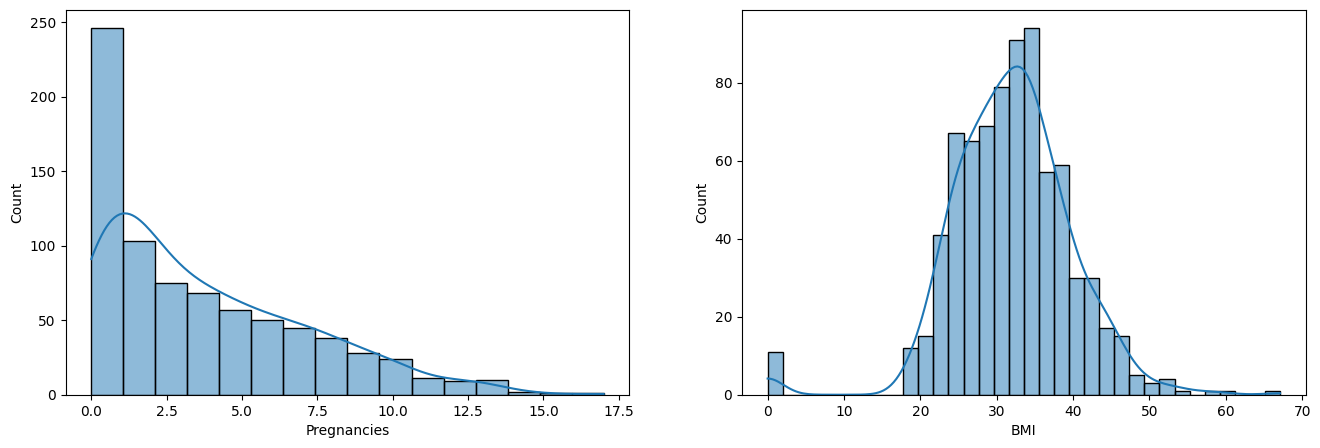

In [30]:
#example
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['BMI'], kde=True)

plt.show()

From the above graph,we see that the pregnancies column is right skewed. So I will do the outlier detection and analysis on this column only.

In [31]:
df['Pregnancies'].describe()

,Pregnancies
count,768.000000
mean,3.845052
std,3.369578
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


<Axes: ylabel='Pregnancies'>

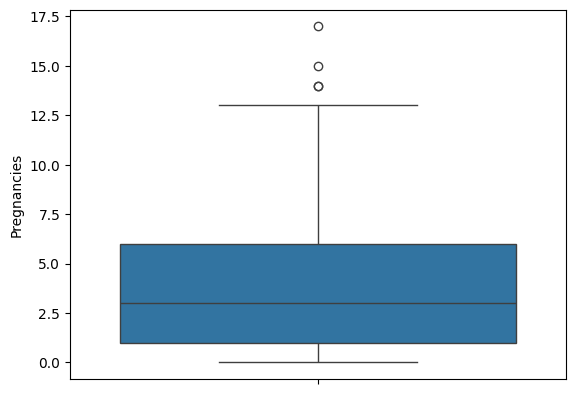

In [32]:
sns.boxplot(data = df['Pregnancies'])

I used a boxplot to identify outliers in the column with a skewed distribution, aiming to address them using the IQR method. The plot indicates the presence of outliers in the upper range, while none are observed in the lower range.

##Finding the IQR

In [35]:
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  6.0
25th quartile:  1.0


In [37]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  5.0


In [38]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 13.5
Lower limit -6.5


##Finding Outliers

In [39]:
df[df['Pregnancies'] > upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [40]:
df[df['Pregnancies'] > upper_limit].count()

,0
Pregnancies,4
Glucose,4
BloodPressure,4
SkinThickness,4
Insulin,4
BMI,4
DiabetesPedigreeFunction,4
Age,4
Outcome,4


##Trimming

In [41]:
new_df = df[df['Pregnancies'] < upper_limit]
new_df.shape

(764, 9)

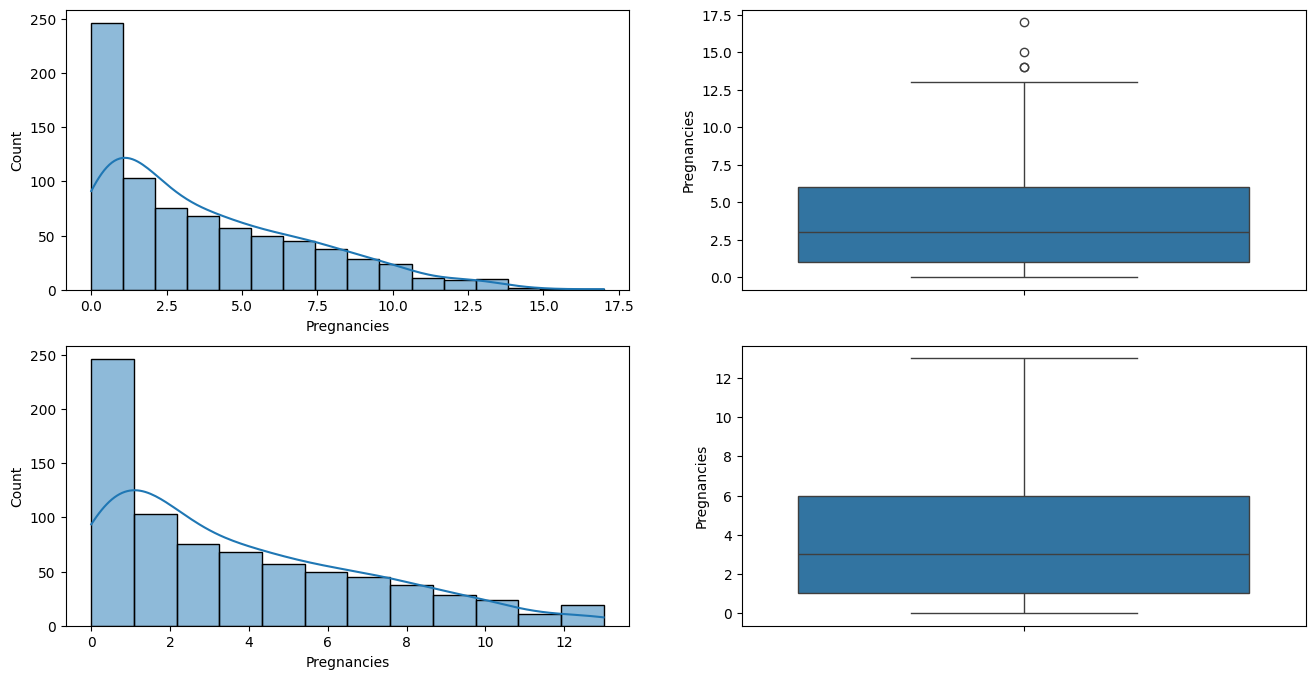

In [42]:
#comparing df and new_df

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Pregnancies'])

plt.subplot(2,2,3)
sns.histplot(new_df['Pregnancies'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df['Pregnancies'])

plt.show()

The main plot, which lets us know whether the outlier is removed or not, is a boxplot. We can see that the outliers are removed.

In [6]:
data.shape

(768, 9)

In [13]:
missing_values_count = data.isnull().sum()
missing_values_count.sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

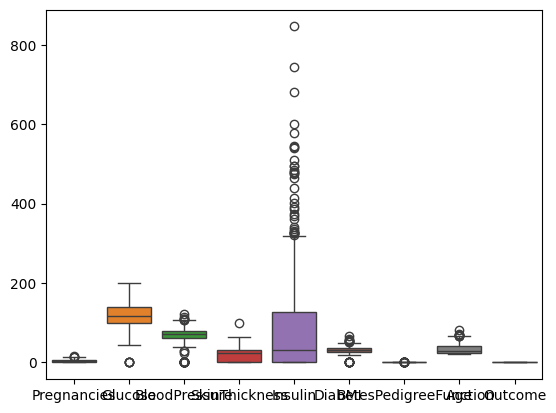

In [17]:
sns.boxplot(data=data)

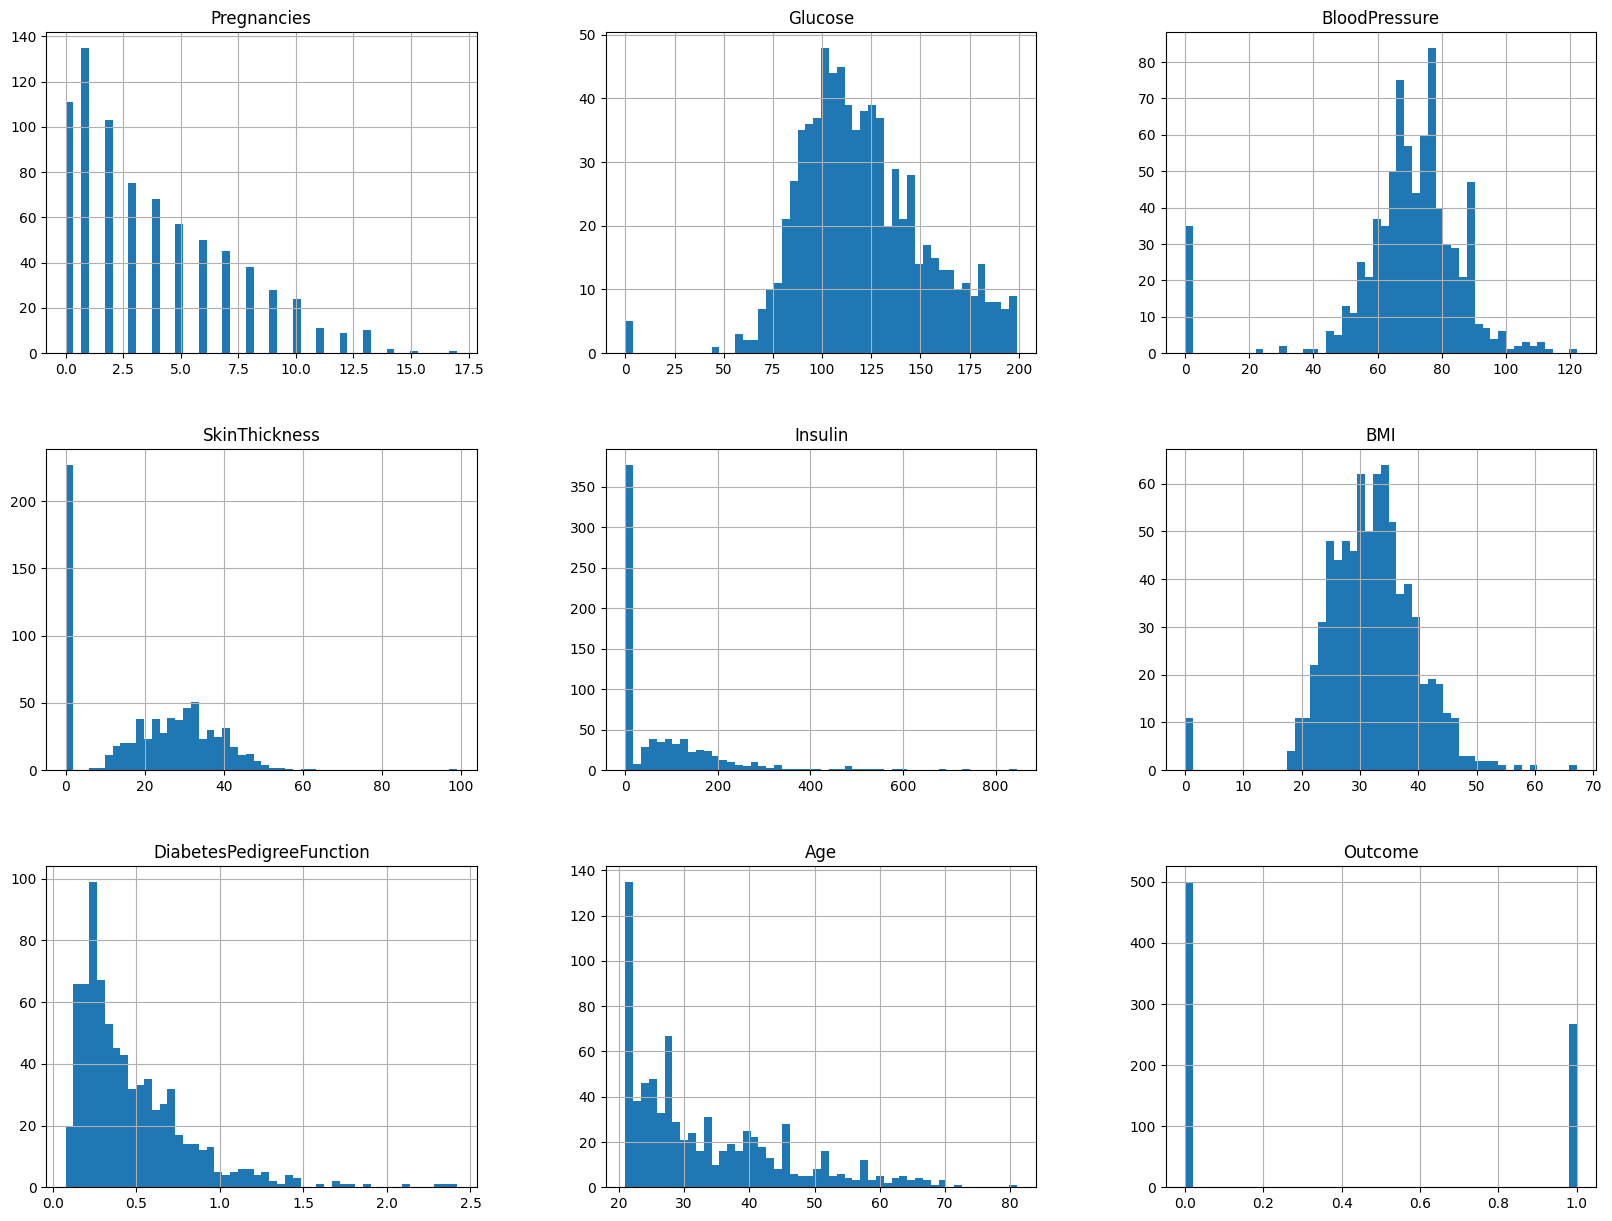

In [18]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
def iqr(data):
  outliers = {}
  for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR

      for value in data[col]:
        if value < lower_bound or value > upper_bound:
          if col in outliers.keys():
            outliers[col].append(value)
          else:
            outliers[col] = []
            outliers[col].append(value)
          #print(f'{value} is an outlier in the {col} column')

  return outliers

In [22]:
iqr(data)

{'Pregnancies': [15, 17, 14, 14],
 'Glucose': [0, 0, 0, 0, 0],
 'BloodPressure': [0,
  0,
  30,
  110,
  0,
  0,
  0,
  0,
  108,
  122,
  30,
  0,
  110,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  108,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  110,
  0,
  24,
  0,
  0,
  0,
  0,
  114,
  0,
  0,
  0],
 'SkinThickness': [99],
 'Insulin': [543,
  846,
  342,
  495,
  325,
  485,
  495,
  478,
  744,
  370,
  680,
  402,
  375,
  545,
  360,
  325,
  465,
  325,
  415,
  579,
  474,
  328,
  480,
  326,
  330,
  600,
  321,
  440,
  540,
  480,
  335,
  387,
  392,
  510],
 'BMI': [0.0,
  0.0,
  0.0,
  0.0,
  53.2,
  55.0,
  0.0,
  67.1,
  52.3,
  52.3,
  52.9,
  0.0,
  0.0,
  59.4,
  0.0,
  0.0,
  57.3,
  0.0,
  0.0],
 'DiabetesPedigreeFunction': [2.288,
  1.441,
  1.39,
  1.893,
  1.781,
  1.222,
  1.4,
  1.321,
  1.224,
  2.329,
  1.318,
  1.213,
  1.353,
  1.224,
  1.391,
  1.476,
  2.137,
  1.731,
  1.268,
  1.6,
  2.42,
  1.251,
  1.699,
  1.258,
  1.282,
  1.698

In [24]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)


,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068
